In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [3]:
# loading Database
with open('/content/sample_data/PFM_database', 'r') as file:
    lines = file.readlines()

In [4]:
# reading the first matrix >MA0001
selected_lines = lines[6:10]
matrix = np.loadtxt(selected_lines)

In [5]:
def print_matrix_with_indices(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(matrix[i][j], end=' ')
        print()

print_matrix_with_indices(matrix)

3.0 1.0 0.0 0.0 32.0 1.0 0.0 0.0 18.0 12.0 
0.0 3.0 0.0 0.0 8.0 60.0 64.0 64.0 10.0 20.0 
60.0 0.0 64.0 64.0 15.0 2.0 0.0 0.0 29.0 26.0 
1.0 60.0 0.0 0.0 9.0 1.0 0.0 0.0 7.0 6.0 


In [6]:
# making PPM from the PFM
total_sequences = np.sum(matrix[:, 0])
PPM = matrix / total_sequences

In [7]:
print_matrix_with_indices(PPM)

0.046875 0.015625 0.0 0.0 0.5 0.015625 0.0 0.0 0.28125 0.1875 
0.0 0.046875 0.0 0.0 0.125 0.9375 1.0 1.0 0.15625 0.3125 
0.9375 0.0 1.0 1.0 0.234375 0.03125 0.0 0.0 0.453125 0.40625 
0.015625 0.9375 0.0 0.0 0.140625 0.015625 0.0 0.0 0.109375 0.09375 


In [8]:
def generate_sequence(ppm_matrix, sequence_length, num_sequences):
    num_positions = ppm_matrix.shape[1]
    sequences = []

    for _ in range(num_sequences):
      sequence = []
      for _ in range(sequence_length):
          probabilities = ppm_matrix[:, len(sequence)]
          nucleotides = ['A', 'C', 'G', 'T']
          nucleotide = np.random.choice(nucleotides, p=probabilities)
          sequence.append(nucleotide)
      sequences.append(sequence)

    return sequences

In [9]:
# generating a random sequence based on PPM
sequences = generate_sequence(PPM, 10, 30)
for s in sequences:
  print(s)

['G', 'T', 'G', 'G', 'C', 'C', 'C', 'C', 'G', 'C']
['G', 'A', 'G', 'G', 'T', 'C', 'C', 'C', 'G', 'A']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'G', 'G']
['A', 'T', 'G', 'G', 'C', 'C', 'C', 'C', 'G', 'G']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'G', 'G']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'C', 'C']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'A']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'G', 'C']
['G', 'T', 'G', 'G', 'C', 'C', 'C', 'C', 'G', 'G']
['A', 'T', 'G', 'G', 'G', 'C', 'C', 'C', 'A', 'C']
['G', 'T', 'G', 'G', 'T', 'C', 'C', 'C', 'T', 'G']
['G', 'T', 'G', 'G', 'G', 'C', 'C', 'C', 'A', 'G']
['G', 'T', 'G', 'G', 'G', 'C', 'C', 'C', 'A', 'G']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'G', 'G']
['G', 'T', 'G', 'G', 'C', 'C', 'C', 'C', 'T', 'A']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'G', 'C']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'C', 'G']
['G', 'T', 'G', 'G', 'G', 'C', 'C', 'C', 'G', 'T']
['G', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G']
['G', 'T', 'G', 'G', 'C', 'C', 

In [10]:
def create_PFM(sequences):
  num_columns = len(sequences[0])

  pfm = np.zeros((4, num_columns))

  for s in sequences:
    for i, nucleotide in enumerate(s):
      if nucleotide == 'A':
        pfm[0, i] += 1
      elif nucleotide == 'C':
        pfm[1, i] += 1
      elif nucleotide == 'G':
        pfm[2, i] += 1
      elif nucleotide == 'T':
        pfm[3, i] += 1
  return pfm

In [11]:
sample_pfm = create_PFM(sequences)

In [12]:
sample_pfm

array([[ 2.,  1.,  0.,  0., 14.,  0.,  0.,  0.,  6.,  4.],
       [ 0.,  0.,  0.,  0.,  5., 30., 30., 30.,  3.,  9.],
       [28.,  0., 30., 30.,  8.,  0.,  0.,  0., 18., 15.],
       [ 0., 29.,  0.,  0.,  3.,  0.,  0.,  0.,  3.,  2.]])

Matrix based comparison : ED

In [24]:
# adding different Pseudo counts and calculating distance using Euclidean distance

pseudocount = 0.01
w = 10
x = []
y = []
y2 = []
y3 = []
z = 0
counter = 1

while z <= 60:

    print(counter)

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM = sample_pfm + (pseudocount / 4)
    artificial_PPM = sample_pfm/(30 + pseudocount)

    print("Pseudocount: ",pseudocount)

    result = np.sum(np.power((PPM - artificial_PPM), 2))
    result = np.sqrt(result)

    print("ED:",result/w)

    multiply_matrix = np.multiply(PPM, artificial_PPM)
    matrix_sum = np.sum(multiply_matrix)

    powered_PPM = np.power(PPM, 2)
    result_PPM = np.sum(powered_PPM)
    result_PPM = np.sqrt(result_PPM)

    powered_artificial_PPM = np.power(artificial_PPM, 2)
    result_artificial = np.sum(powered_artificial_PPM)
    result_artificial = np.sqrt(result_artificial)

    COS = 1 - (matrix_sum/(result_PPM * result_artificial))

    print("COS:",COS)

    tvd = np.sum(np.abs(PPM - artificial_PPM))
    print("TVD:",tvd/(2 * w))


    x.append(pseudocount)
    y.append(result/w)
    y2.append(COS)
    y3.append(tvd/(2 * w))
    z += 1
    counter += 1

    print("--------------------------------------------------------------")

1
Pseudocount:  0.01
ED: 0.024257587621080802
COS: 0.0035991943865363307
TVD: 0.04442165111629457
--------------------------------------------------------------
2
Pseudocount:  0.011220184543019636
ED: 0.024254550343376056
COS: 0.0035991943865362197
TVD: 0.04442734128523811
--------------------------------------------------------------
3
Pseudocount:  0.012589254117941675
ED: 0.024251148724640074
COS: 0.0035991943865364417
TVD: 0.04443372520899774
--------------------------------------------------------------
4
Pseudocount:  0.01412537544622754
ED: 0.02424733993122629
COS: 0.0035991943865362197
TVD: 0.04444088739594222
--------------------------------------------------------------
5
Pseudocount:  0.015848931924611134
ED: 0.02424307632357559
COS: 0.0035991943865364417
TVD: 0.04444892262915761
--------------------------------------------------------------
6
Pseudocount:  0.01778279410038923
ED: 0.02423830497887811
COS: 0.0035991943865364417
TVD: 0.04445793721062382
----------------------

Matrix based comparison : COS

In [29]:
pseudocount = 0.01

delta = 0.1
x2 = []
y2 = []
z = 0
counter = 1

while z <= 60:

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM = (sample_pfm + (pseudocount / 4)) / (30 + pseudocount)

    multiply_matrix = np.multiply(PPM, artificial_PPM)
    matrix_sum = np.sum(multiply_matrix)

    powered_PPM = np.power(PPM, 2)
    result_PPM = np.sum(powered_PPM)
    result_PPM = np.sqrt(result_PPM)

    powered_artificial_PPM = np.power(artificial_PPM, 2)
    result_artificial = np.sum(powered_artificial_PPM)
    result_artificial = np.sqrt(result_artificial)

    COS = 1 - (matrix_sum/(result_PPM * result_artificial))

    x2.append(pseudocount)
    y2.append(COS)
    counter += 1
    z += 1


In [30]:
normalized = np.interp(y, (np.min(y), np.max(y)), (0, 1))
normalized2 = np.interp(y2, (np.min(y2), np.max(y2)), (0, 1))
normalized3 = np.interp(y3, (np.min(y3), np.max(y3)), (0, 1))

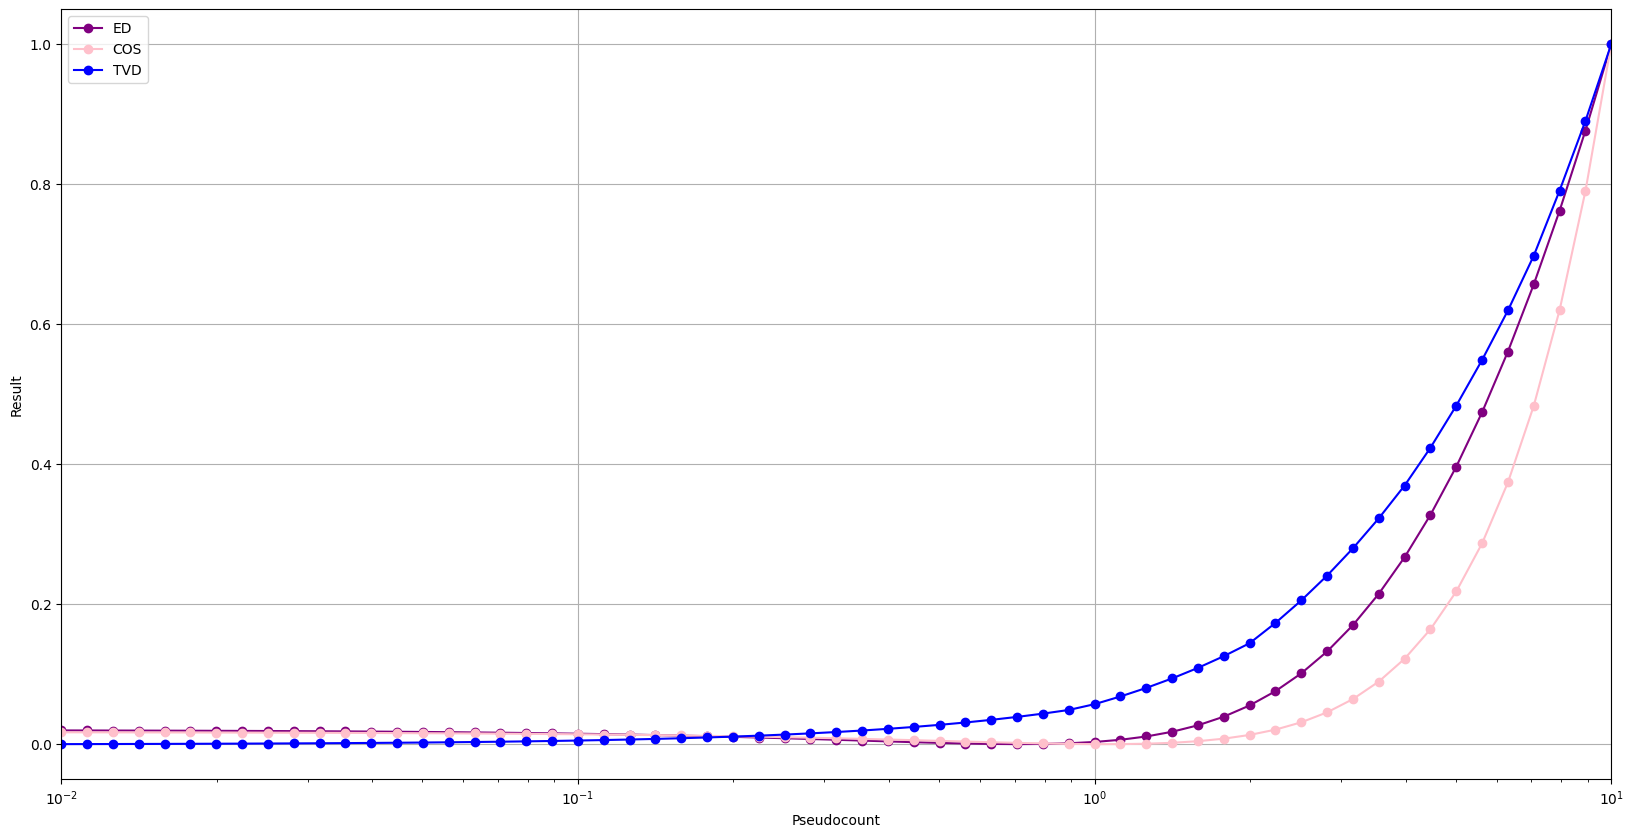

In [31]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow'])
plt.figure(figsize=(20, 10))
plt.semilogx(x, normalized, label='ED',marker='o', linestyle='-')
plt.semilogx(x, normalized2, label='COS',marker='o', linestyle='-')
plt.semilogx(x, normalized3, label='TVD',marker='o', linestyle='-')
plt.xlabel('Pseudocount')
plt.ylabel('Result')
plt.xlim(0.01, 10)
plt.legend()
plt.grid(True)
plt.show()

In [32]:
sequences_10 = generate_sequence(PPM, 10, 10)
sequences_20 = generate_sequence(PPM, 10, 20)
sequences_30 = generate_sequence(PPM, 10, 30)
sequences_40 = generate_sequence(PPM, 10, 40)
sequences_50 = generate_sequence(PPM, 10, 50)

In [33]:
sample_pfm_10 = create_PFM(sequences_10)
sample_pfm_20 = create_PFM(sequences_20)
sample_pfm_30 = create_PFM(sequences_30)
sample_pfm_40 = create_PFM(sequences_40)
sample_pfm_50 = create_PFM(sequences_50)

In [34]:
def substract(lst):
  min_value = min(lst)
  new_lst = [x - min_value for x in lst]
  return new_lst

In [35]:
# adding different Pseudo counts and calculating distance using Euclidean distance

pseudocount = 0.01
w = 10
x = []
y = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
z = 0
counter = 1

while z <= 60:

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM_10 = sample_pfm_10 + (pseudocount / 4)
    artificial_PPM_10 = sample_pfm_10/(10 + pseudocount)

    result_10 = np.sum(np.power((PPM - artificial_PPM_10), 2))
    result_10 = np.sqrt(result_10)



    artificial_PPM_20 = sample_pfm_20 + (pseudocount / 4)
    artificial_PPM_20 = sample_pfm_20/(20 + pseudocount)

    result_20 = np.sum(np.power((PPM - artificial_PPM_20), 2))
    result_20 = np.sqrt(result_20)



    artificial_PPM_30 = sample_pfm_30 + (pseudocount / 4)
    artificial_PPM_30 = sample_pfm_30/(30 + pseudocount)

    result_30 = np.sum(np.power((PPM - artificial_PPM_30), 2))
    result_30 = np.sqrt(result_30)



    artificial_PPM_40 = sample_pfm_40 + (pseudocount / 4)
    artificial_PPM_40 = sample_pfm_40/(40 + pseudocount)

    result_40 = np.sum(np.power((PPM - artificial_PPM_40), 2))
    result_40 = np.sqrt(result_40)



    artificial_PPM_50 = sample_pfm_50 + (pseudocount / 4)
    artificial_PPM_50 = sample_pfm_50/(50 + pseudocount)

    result_50 = np.sum(np.power((PPM - artificial_PPM_50), 2))
    result_50 = np.sqrt(result_50)



    x.append(pseudocount)
    y.append(result_10/w)
    x2.append(pseudocount)
    y2.append(result_20/w)
    x3.append(pseudocount)
    y3.append(result_30/w)
    x4.append(pseudocount)
    y4.append(result_40/w)
    x5.append(pseudocount)
    y5.append(result_50/w)
    z += 1
    counter += 1


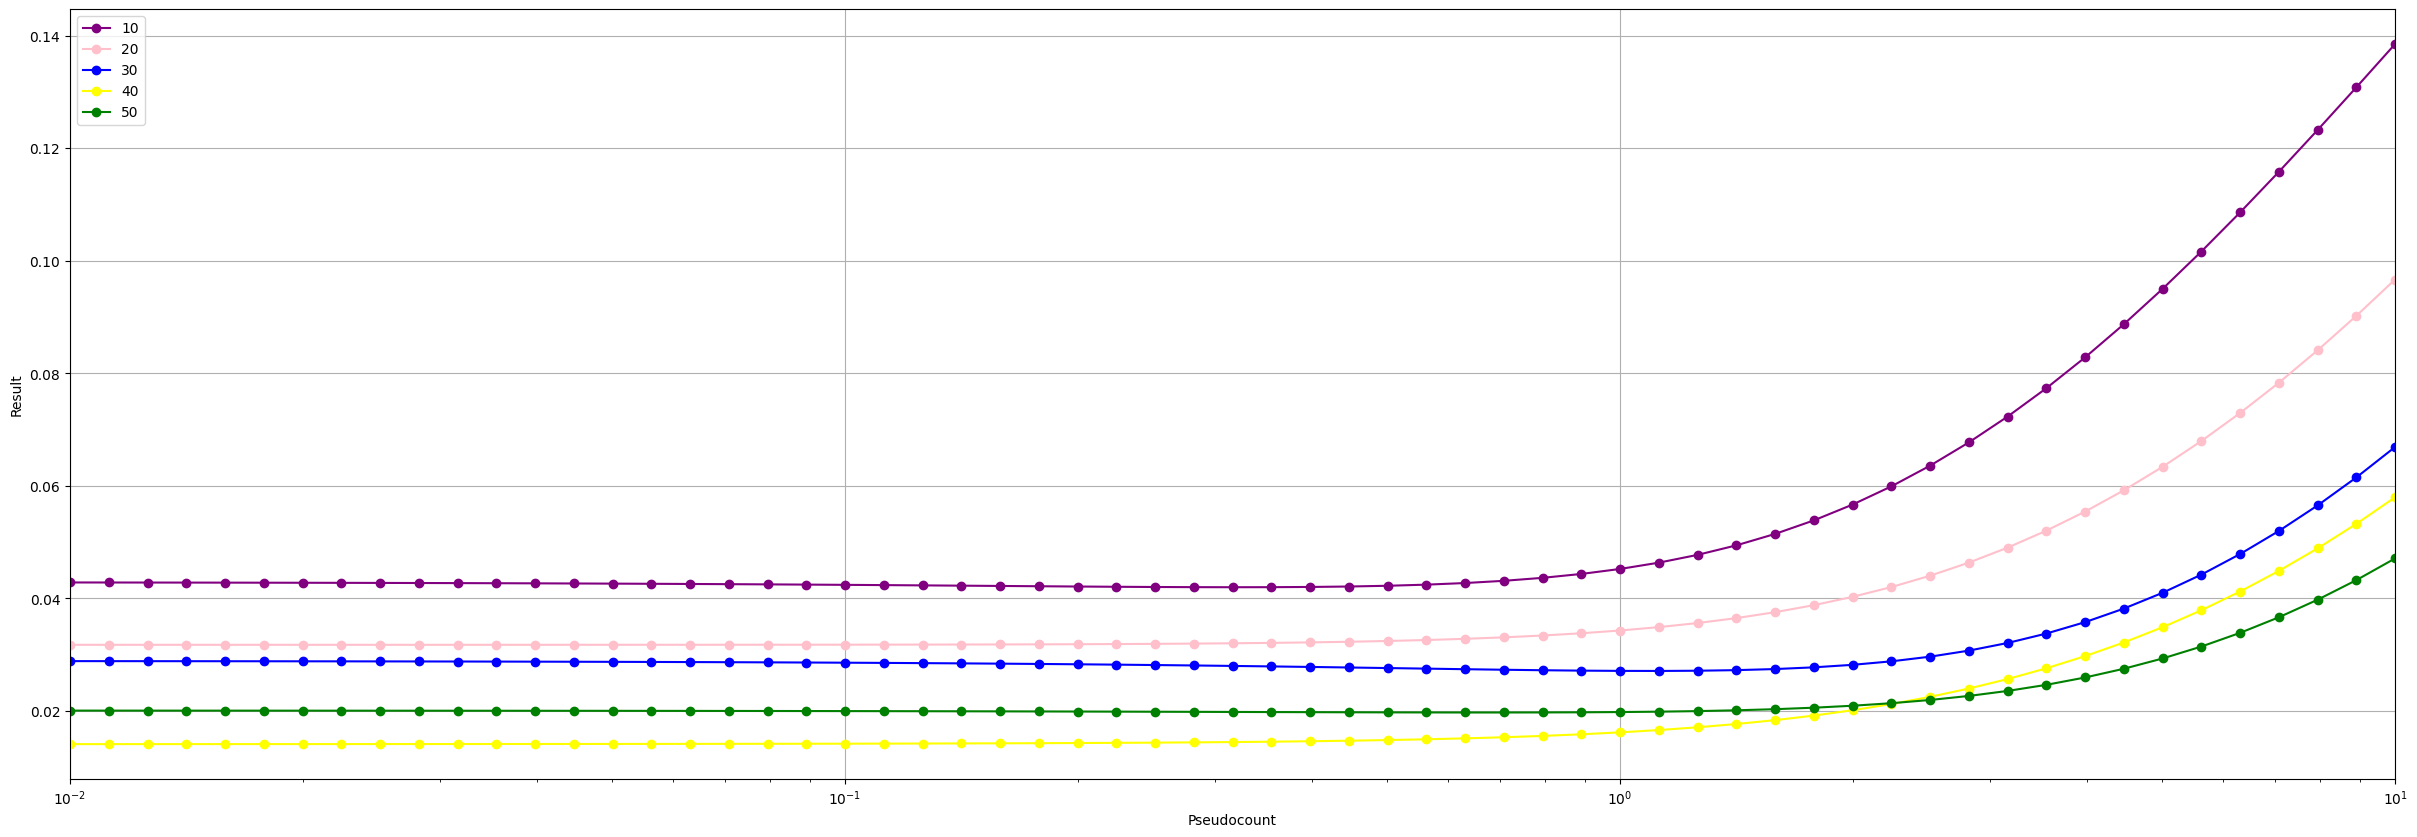

In [36]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow', 'green'])
plt.figure(figsize=(30, 10))
plt.semilogx(x, y, label='10',marker='o', linestyle='-')
plt.semilogx(x2, y2, label='20',marker='o', linestyle='-')
plt.semilogx(x3, y3, label='30',marker='o', linestyle='-')
plt.semilogx(x4, y4, label='40',marker='o', linestyle='-')
plt.semilogx(x5, y5, label='50',marker='o', linestyle='-')
plt.xlabel('Pseudocount')
plt.ylabel('Result')
plt.xlim(0.01, 10)
plt.legend()
plt.grid(True)
plt.show()